Outlier Definition:

Outliers are data points that significantly deviate from the normal pattern in a dataset. These anomalous observations can have a substantial impact on machine learning models, affecting their performance and accuracy. Understanding and handling outliers is crucial for developing robust and reliable models.

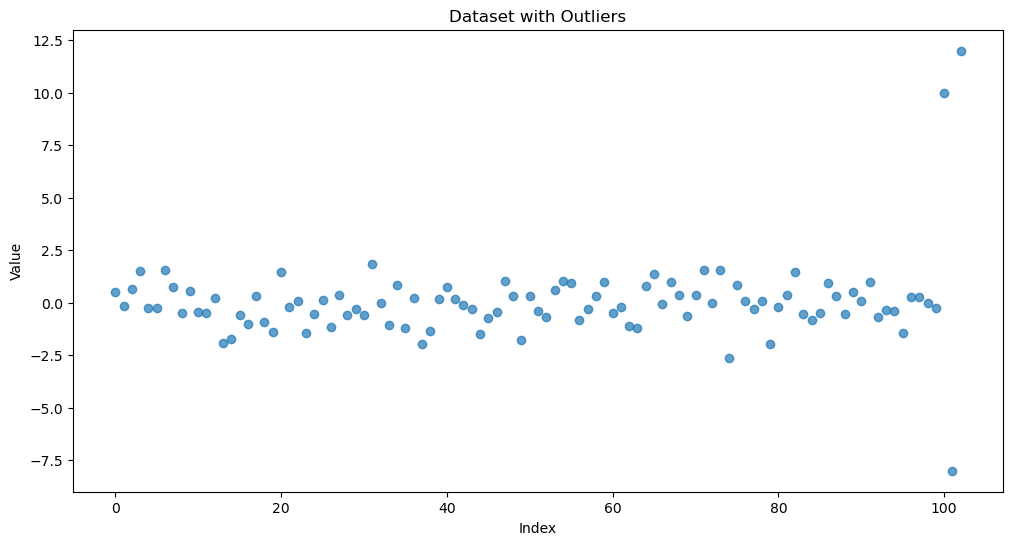

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a dataset with outliers
np.random.seed(42)
data = np.random.normal(0, 1, 100)
outliers = np.array([10, -8, 12])
full_data = np.concatenate([data, outliers])

# Plot the data
plt.figure(figsize=(12, 6))
plt.scatter(range(len(full_data)), full_data, alpha=0.7)
plt.title("Dataset with Outliers")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()


Types of Outliers

There are three main types of outliers in machine learning: point outliers, contextual outliers, and collective outliers. 


1) Point outliers are individual data points that deviate significantly from the rest. 

2) Contextual outliers are data points that are unusual in a specific context. 

3) Collective outliers are groups of data points that deviate from the overall pattern.

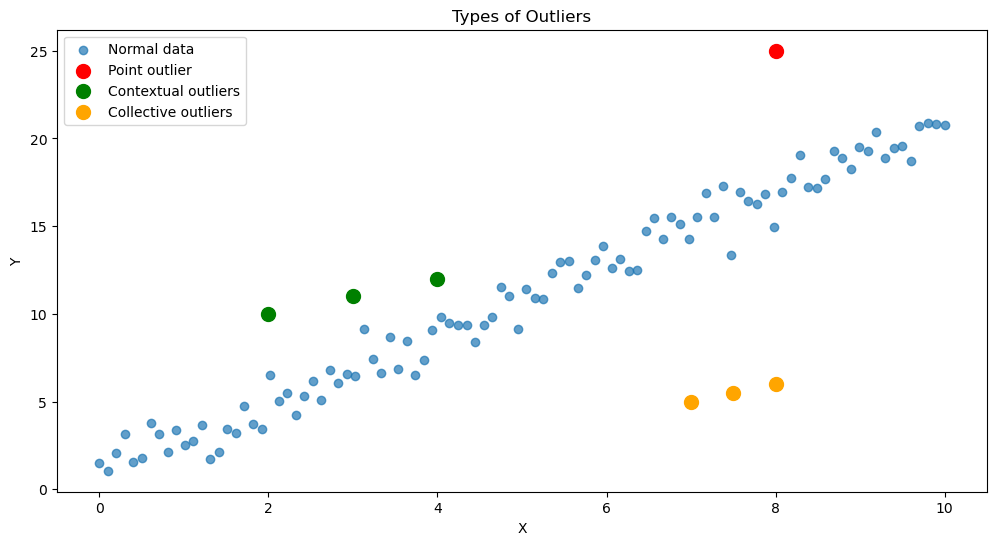

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data with different types of outliers
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 1, 100)

# Add outliers
point_outlier = (8, 25)
contextual_outliers = [(2, 10), (3, 11), (4, 12)]
collective_outliers = [(7, 5), (7.5, 5.5), (8, 6)]

# Plot the data
plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.7, label="Normal data")
plt.scatter(*point_outlier, color='red', s=100, label="Point outlier")
plt.scatter(*zip(*contextual_outliers), color='green', s=100, label="Contextual outliers")
plt.scatter(*zip(*collective_outliers), color='orange', s=100, label="Collective outliers")

plt.title("Types of Outliers")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


Impact on Machine Learning Models

Outliers can significantly affect machine learning models in various ways. They can skew the learned relationships during model training, leading to poor generalization and reduced performance on unseen data. Outliers may also artificially inflate or deflate the importance of certain features, causing misinterpretation of the model's results.

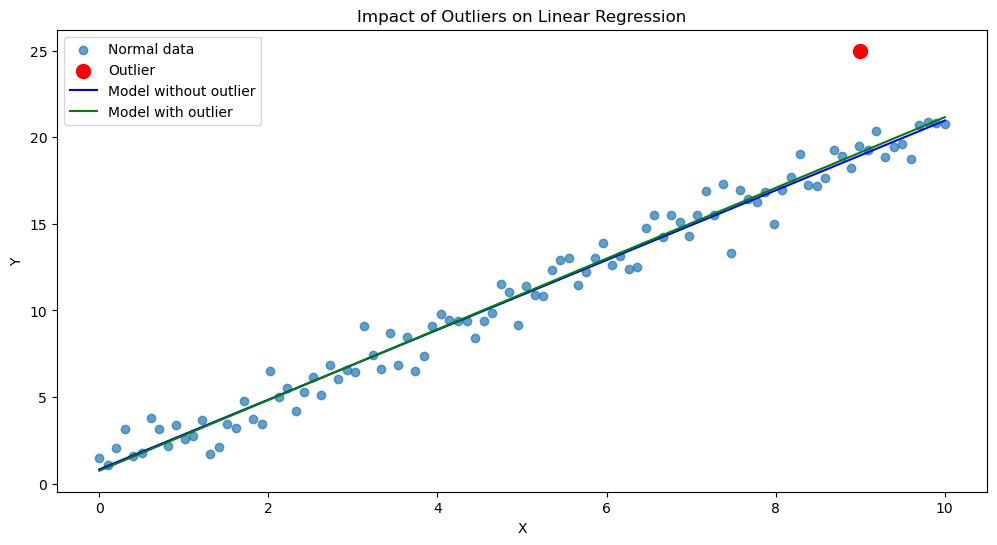

Slope without outlier: 2.01
Slope with outlier: 2.04


In [64]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate data with an outlier
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.ravel() + 1 + np.random.normal(0, 1, 100)
X_outlier = np.array([[9]])
y_outlier = np.array([25])

# Fit models with and without the outlier
model_without_outlier = LinearRegression().fit(X, y)
X_with_outlier = np.vstack([X, X_outlier])
y_with_outlier = np.hstack([y, y_outlier])
model_with_outlier = LinearRegression().fit(X_with_outlier, y_with_outlier)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.7, label="Normal data")
plt.scatter(X_outlier, y_outlier, color='red', s=100, label="Outlier")
plt.plot(X, model_without_outlier.predict(X), color='blue', label="Model without outlier")
plt.plot(X, model_with_outlier.predict(X), color='green', label="Model with outlier")
plt.title("Impact of Outliers on Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

print(f"Slope without outlier: {model_without_outlier.coef_[0]:.2f}")
print(f"Slope with outlier: {model_with_outlier.coef_[0]:.2f}")


Outlier Detection: Statistical Methods

Statistical methods are commonly used for detecting outliers in machine learning. Two popular approaches are the Z-score method and the Interquartile Range (IQR) method. 
The Z-score measures how many standard deviations a data point is from the mean, while the IQR method identifies outliers based on the distribution's quartiles.

In [65]:
import numpy as np
from scipy import stats

def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return np.where(z_scores > threshold)[0]

def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where((data < lower_bound) | (data > upper_bound))[0]

# Generate sample data with outliers
np.random.seed(42)
data = np.random.normal(0, 1, 1000)
outliers = np.array([10, -8, 12, -9, 11])
full_data = np.concatenate([data, outliers])

# Detect outliers using both methods
zscore_outliers = detect_outliers_zscore(full_data)
iqr_outliers = detect_outliers_iqr(full_data)

print("Z-score detected outliers:", zscore_outliers)
print("IQR detected outliers:", iqr_outliers)


Z-score detected outliers: [ 209 1000 1001 1002 1003 1004]
IQR detected outliers: [  74  179  209  262  478  646  668  755 1000 1001 1002 1003 1004]


Outlier Detection: Distance-based Methods

Distance-based methods for outlier detection rely on measuring the distance between data points to identify anomalies. One popular algorithm in this category is the Local Outlier Factor (LOF). LOF compares the local density of a point with the local densities of its neighbors, assigning higher scores to points with lower local density.

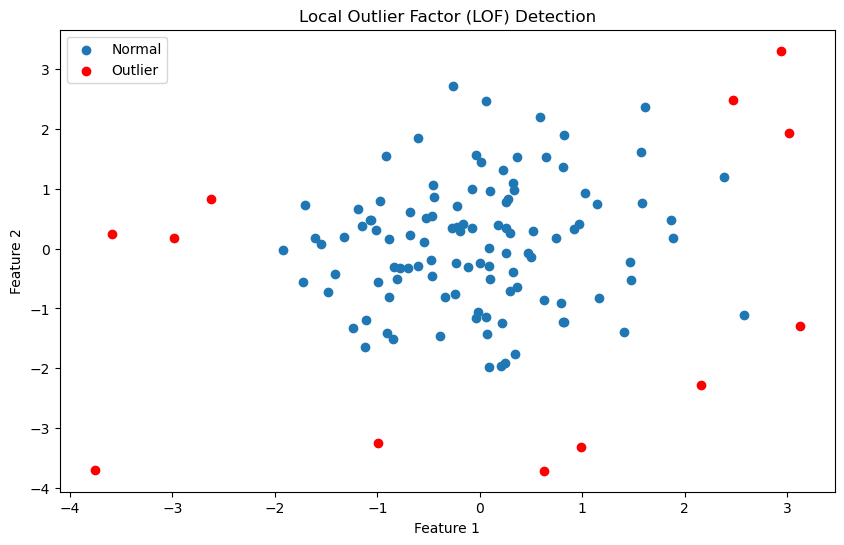

Number of detected outliers: 12


In [66]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data with outliers
np.random.seed(42)
X = np.random.normal(0, 1, (100, 2))
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.concatenate([X, X_outliers])

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], label="Normal")
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], color='red', label="Outlier")
plt.title("Local Outlier Factor (LOF) Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

print(f"Number of detected outliers: {sum(y_pred == -1)}")

Slide 7: Handling Outliers: Removal and Transformation

Two common approaches for handling outliers are removal and transformation. Removal involves eliminating outliers from the dataset, while transformation applies mathematical functions to reduce their impact. Both methods aim to mitigate the influence of outliers on machine learning models.

In [67]:
import numpy as np
from sklearn.preprocessing import RobustScaler

# Generate sample data with outliers
np.random.seed(42)
data = np.random.normal(0, 1, 1000)
outliers = np.array([10, -8, 12, -9, 11])
full_data = np.concatenate([data, outliers])

# Remove outliers
def remove_outliers(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    return data[z_scores < threshold]

# Transform data using RobustScaler
def transform_data(data):
    scaler = RobustScaler()
    return scaler.fit_transform(data.reshape(-1, 1)).ravel()

# Apply both methods
data_removed = remove_outliers(full_data)
data_transformed = transform_data(full_data)

print(f"Original data range: [{full_data.min():.2f}, {full_data.max():.2f}]")
print(f"Data range after removal: [{data_removed.min():.2f}, {data_removed.max():.2f}]")
print(f"Data range after transformation: [{data_transformed.min():.2f}, {data_transformed.max():.2f}]")


Original data range: [-9.00, 12.00]
Data range after removal: [-3.24, 3.08]
Data range after transformation: [-6.94, 9.20]


Slide 8: Handling Outliers: Capping and Imputation

Capping and imputation are two additional techniques for handling outliers. Capping involves limiting extreme values to a specified threshold, while imputation replaces outliers with more representative values. These methods help maintain the original data size while reducing the impact of outliers.

In [68]:
import numpy as np
from sklearn.impute import KNNImputer

# Generate sample data with outliers
np.random.seed(42)
data = np.random.normal(0, 1, 1000)
outliers = np.array([10, -8, 12, -9, 11])
full_data = np.concatenate([data, outliers])

# Capping outliers
def cap_outliers(data, lower_percentile=1, upper_percentile=99):
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return np.clip(data, lower_bound, upper_bound)

# Impute outliers using KNN
def impute_outliers(data, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    return imputer.fit_transform(data.reshape(-1, 1)).ravel()

# Apply both methods
data_capped = cap_outliers(full_data)
data_imputed = impute_outliers(full_data)

print(f"Original data range: [{full_data.min():.2f}, {full_data.max():.2f}]")
print(f"Data range after capping: [{data_capped.min():.2f}, {data_capped.max():.2f}]")
print(f"Data range after imputation: [{data_imputed.min():.2f}, {data_imputed.max():.2f}]")


Original data range: [-9.00, 12.00]
Data range after capping: [-2.20, 2.46]
Data range after imputation: [-9.00, 12.00]


Slide 9: Considerations When Dealing with Outliers

When handling outliers in machine learning, it's crucial to consider various factors. Domain knowledge plays a vital role in understanding the context of the data and determining whether outliers are genuine anomalies or valuable rare events. The size of the dataset can influence the impact of outliers, with larger datasets being generally more robust. Additionally, some machine learning models are inherently more resistant to outliers than others.

In [69]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error

# Generate sample data with outliers
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.ravel() + 1 + np.random.normal(0, 1, 100)
X_outlier = np.array([[9]])
y_outlier = np.array([25])

X_with_outlier = np.vstack([X, X_outlier])
y_with_outlier = np.hstack([y, y_outlier])

# Train different models
lr = LinearRegression().fit(X_with_outlier, y_with_outlier)
huber = HuberRegressor().fit(X_with_outlier, y_with_outlier)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_with_outlier, y_with_outlier)

# Evaluate models
models = [lr, huber, rf]
model_names = ["Linear Regression", "Huber Regression", "Random Forest"]

for name, model in zip(model_names, models):
    mse = mean_squared_error(y, model.predict(X))
    print(f"{name} MSE: {mse:.4f}")


Linear Regression MSE: 0.8249
Huber Regression MSE: 0.8164
Random Forest MSE: 0.2071


Slide 10: Real-life Example: Anomaly Detection in Manufacturing

In manufacturing, detecting anomalies is crucial for quality control and maintaining production efficiency. Outlier detection techniques can be applied to sensor data from production lines to identify faulty products or equipment malfunctions. This example demonstrates how to use the Isolation Forest algorithm for detecting anomalies in a simulated manufacturing process.

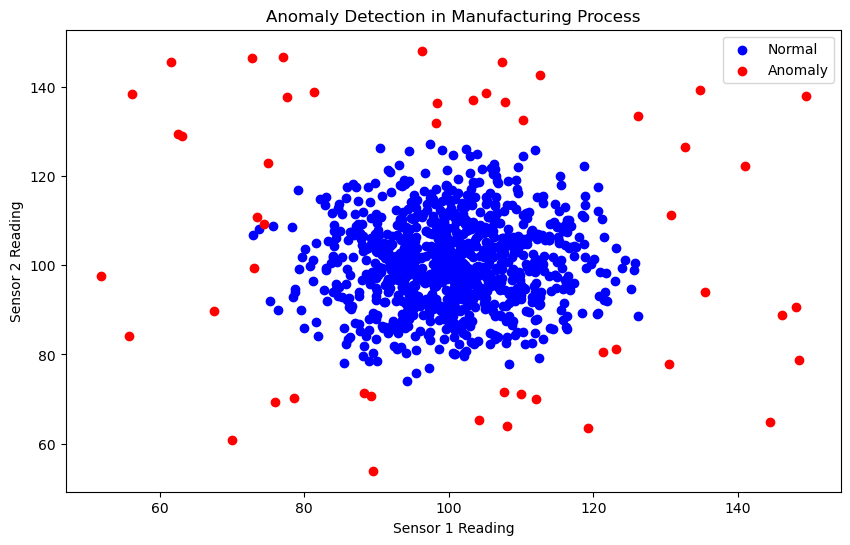

Number of detected anomalies: 50


In [70]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Simulate manufacturing process data
np.random.seed(42)
n_samples = 1000
n_outliers = 50

normal_data = np.random.normal(loc=100, scale=10, size=(n_samples - n_outliers, 2))
outlier_data = np.random.uniform(low=50, high=150, size=(n_outliers, 2))

X = np.vstack([normal_data, outlier_data])

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
predictions = iso_forest.fit_predict(X)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X[predictions == 1, 0], X[predictions == 1, 1], c='blue', label='Normal')
plt.scatter(X[predictions == -1, 0], X[predictions == -1, 1], c='red', label='Anomaly')
plt.title('Anomaly Detection in Manufacturing Process')
plt.xlabel('Sensor 1 Reading')
plt.ylabel('Sensor 2 Reading')
plt.legend()
plt.show()

print(f"Number of detected anomalies: {sum(predictions == -1)}")


Slide 11: Real-life Example: Outlier Detection in Climate Data

Climate scientists often work with large datasets containing temperature, precipitation, and other meteorological measurements. Identifying outliers in these datasets is crucial for understanding extreme weather events and maintaining data quality. This example demonstrates how to use the Interquartile Range (IQR) method to detect outliers in simulated daily temperature data.

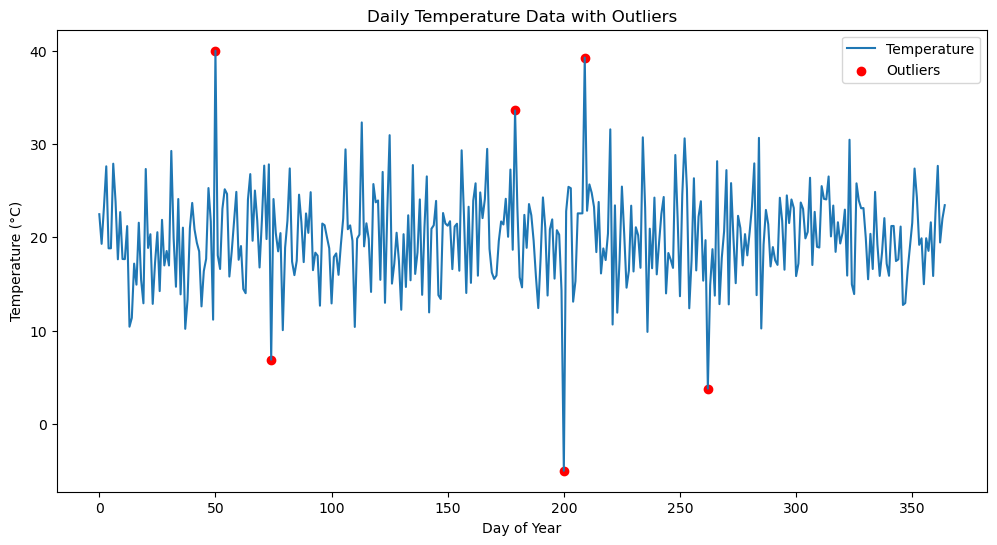

Number of detected outliers: 6


In [71]:
import numpy as np
import matplotlib.pyplot as plt

def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Simulate daily temperature data for a year
np.random.seed(42)
temperatures = np.random.normal(loc=20, scale=5, size=365)

# Add some outliers (extreme temperatures)
temperatures[50] = 40  # Unusually hot day
temperatures[200] = -5  # Unusually cold day

# Detect outliers
outliers = detect_outliers_iqr(temperatures)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(range(365), temperatures, label='Temperature')
plt.scatter(np.where(outliers)[0], temperatures[outliers], color='red', label='Outliers')
plt.title('Daily Temperature Data with Outliers')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

print(f"Number of detected outliers: {sum(outliers)}")


Slide 12: Challenges in Outlier Detection and Handling

Dealing with outliers in machine learning presents several challenges. One of the main difficulties is distinguishing between true outliers and valuable rare events. This requires domain expertise and careful analysis of the data context. Another challenge is balancing outlier handling with maintaining data integrity, as aggressive outlier removal or transformation can lead to loss of important information.

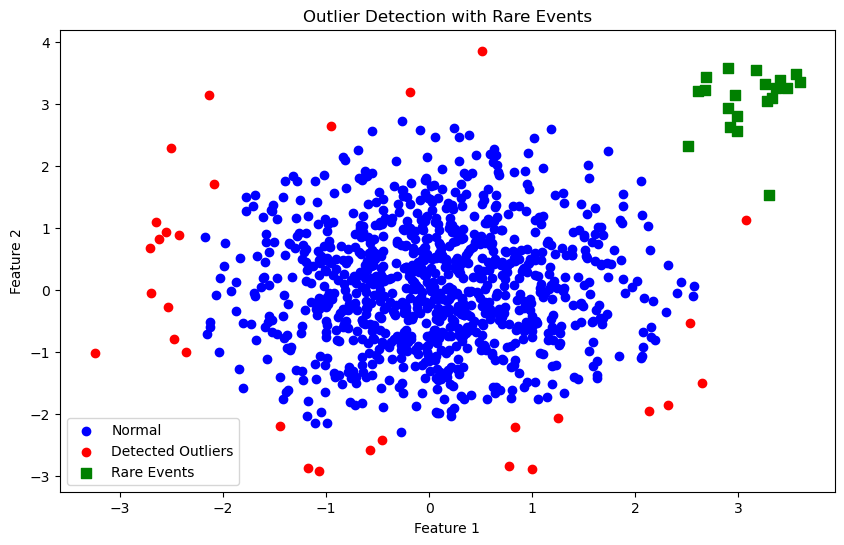

Number of detected outliers: 50
Number of rare events detected as outliers: 20


In [72]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Generate sample data with rare events
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=(980, 2))
rare_events = np.random.normal(loc=3, scale=0.5, size=(20, 2))
X = np.vstack([normal_data, rare_events])

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
predictions = iso_forest.fit_predict(X)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X[predictions == 1, 0], X[predictions == 1, 1], c='blue', label='Normal')
plt.scatter(X[predictions == -1, 0], X[predictions == -1, 1], c='red', label='Detected Outliers')
plt.scatter(X[-20:, 0], X[-20:, 1], c='green', marker='s', s=60, label='Rare Events')
plt.title('Outlier Detection with Rare Events')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(f"Number of detected outliers: {sum(predictions == -1)}")
print(f"Number of rare events detected as outliers: {sum(predictions[-20:] == -1)}")


Slide 13: Advanced Techniques: Ensemble Methods for Outlier Detection

Ensemble methods combine multiple outlier detection algorithms to improve accuracy and robustness. These techniques leverage the strengths of different approaches to provide more reliable outlier detection. One popular ensemble method is the Isolation Forest algorithm, which uses an ensemble of isolation trees to identify anomalies.

In [73]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
import numpy as np

class OutlierEnsemble:
    def __init__(self, contamination=0.1):
        self.contamination = contamination
        self.detectors = [
            IsolationForest(contamination=contamination, random_state=42),
            OneClassSVM(nu=contamination),
            EllipticEnvelope(contamination=contamination, random_state=42)
        ]
    
    def fit_predict(self, X):
        predictions = np.zeros((len(self.detectors), X.shape[0]))
        for i, detector in enumerate(self.detectors):
            predictions[i] = detector.fit_predict(X)
        
        # Combine predictions (majority voting)
        ensemble_pred = np.sum(predictions, axis=0)
        return np.where(ensemble_pred > 0, 1, -1)

# Generate sample data with outliers
np.random.seed(42)
X = np.random.normal(0, 1, (100, 2))
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.concatenate([X, X_outliers])

# Apply ensemble method
ensemble = OutlierEnsemble(contamination=0.1)
predictions = ensemble.fit_predict(X)

print(f"Number of detected outliers: {sum(predictions == -1)}")


Number of detected outliers: 12


Slide 14: Advanced Techniques: Deep Learning for Anomaly Detection

Deep learning approaches, such as autoencoders, can be effective for detecting anomalies in complex, high-dimensional datasets. Autoencoders learn to compress and reconstruct input data, and anomalies can be identified by measuring the reconstruction error. This technique is particularly useful for unsupervised anomaly detection in image and time series data.

In [74]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define autoencoder architecture
def create_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Generate sample data
np.random.seed(42)
normal_data = np.random.normal(0, 1, (1000, 10))
anomalies = np.random.uniform(-5, 5, (100, 10))

# Train autoencoder
autoencoder = create_autoencoder(input_dim=10, encoding_dim=5)
autoencoder.fit(normal_data, normal_data, epochs=50, batch_size=32, shuffle=True, validation_split=0.1, verbose=0)

# Detect anomalies
all_data = np.vstack([normal_data, anomalies])
reconstructions = autoencoder.predict(all_data)
mse = np.mean(np.power(all_data - reconstructions, 2), axis=1)
threshold = np.percentile(mse, 95)  # Consider top 5% as anomalies
anomaly_mask = mse > threshold

print(f"Number of detected anomalies: {sum(anomaly_mask)}")
print(f"True anomalies detected: {sum(anomaly_mask[-100:])}")


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
Number of detected anomalies: 55
True anomalies detected: 55


Slide 15: Additional Resources

For those interested in delving deeper into outlier detection and handling in machine learning, the following resources provide valuable insights and advanced techniques:

1) "Outlier Analysis" by Charu C. Aggarwal (Springer, 2017) This comprehensive book covers various aspects of outlier detection, including algorithms, applications, and challenges.
2) "A Comparative Evaluation of Unsupervised Anomaly Detection Algorithms for Multivariate Data" by Goldstein and Uchida (2016) ArXiv: https://arxiv.org/abs/1603.04240 This paper provides a thorough comparison of different unsupervised anomaly detection algorithms.
3) "Isolation Forest" by Liu, Ting, and Zhou (2008) This seminal paper introduces the Isolation Forest algorithm, which has become a popular method for anomaly detection.
4) Scikit-learn documentation on outlier detection: https://scikit-learn.org/stable/modules/outlier_detection.html This resource provides practical examples and explanations of various outlier detection techniques implemented in scikit-learn.
5) PyOD (Python Outlier Detection) library: https://github.com/yzhao062/pyod A comprehensive Python toolkit for detecting outliers in multivariate data, offering a wide range of algorithms and ensemble methods.